# OCR prediction:

## importing libraries

In [5]:
import easyocr
import cv2
import matplotlib.pyplot as plt


##  Initialize the EasyOCR reader

In [8]:

# 'en' is for English, you can add more languages if needed (e.g., ['en', 'fr'] for English and French)
reader = easyocr.Reader(['en'])


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on Gi

## Function to display the image with bounding boxes around detected text

In [11]:

def display_image_with_boxes(image, results):
    # Loop through the results (each result contains the bounding box, text, and confidence score)
    for (bbox, text, confidence) in results:
        # Get the four corners of the bounding box
        top_left, top_right, bottom_right, bottom_left = bbox
        top_left = tuple([int(val) for val in top_left])
        bottom_right = tuple([int(val) for val in bottom_right])

        # Draw the bounding box on the image
        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

        # Annotate the image with the detected text (case-sensitive)
        cv2.putText(image, text, (top_left[0], top_left[1] - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

    # Convert the image to RGB format for displaying
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    

## Function to perform OCR on the image and print the detected text

In [14]:

def extract_text_from_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Use EasyOCR to detect text (case-sensitive)
    results = reader.readtext(image)

    # Display the image with bounding boxes and text
    display_image_with_boxes(image.copy(), results)

    # Print the extracted text (case-sensitive)
    print("Detected Text Details:")
    for (bbox, text, confidence) in results:
        print(f"Text: {text}, Confidence: {confidence:.2f}")

## Test the OCR on a sample product image

In [17]:
def extract_text_from_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Use EasyOCR to detect text (case-sensitive)
    results = reader.readtext(image)

    # Display the image with bounding boxes and text
    display_image_with_boxes(image.copy(), results)

    # Print the extracted text (case-sensitive)
    print("Detected Text Details:")
    for (bbox, text, _) in results:
        print({text})


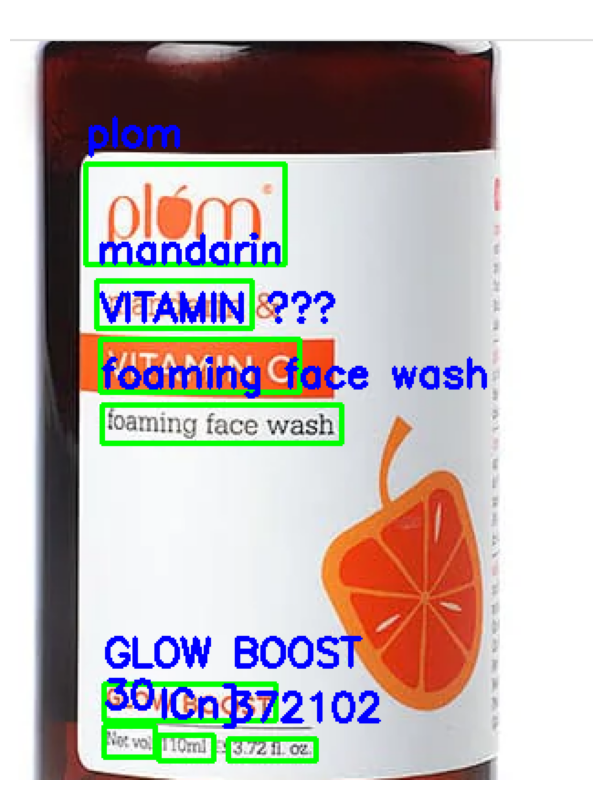

Detected Text Details:
{'plom'}
{'mandarin'}
{'VITAMIN €'}
{'foaming face wash'}
{'GLOW BOOST'}
{'ICn]'}
{'372102'}
{'30'}


In [19]:
# Test the OCR on a sample product image
image_path = r'C:\Users\DELL\Documents\smart_vision_project\ocr\brandname.png'  # Replace with the path to your product image
extract_text_from_image(image_path)